In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/superstore_data.csv')


In [3]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [4]:
# Checking for null values
df.isnull().sum()

# Checking for NaN values
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [5]:
# Checking for duplicates
df.duplicated().sum()

0

No duplicates found

In [6]:
# Dropping null/nan rows from data

df_clean = df.dropna()


In [7]:

df_clean['Marital_Status']=df_clean['Marital_Status'].map({'Divorced':1, 'Single':1, 'Married':2, 'Together':2, 'Widow':1, 'YOLO':1,
'Alone':1, 'Absurd':1})

In [8]:
pd.set_option('display.max_columns', None)

df_clean.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,1,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,1,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,2,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,2,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,1,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [9]:
# Checking data types. 
df_clean.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [10]:
# Converting Dt_Customer to datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'])

In [11]:
# One-hot encoding Education and Maritial_Status
df_clean = pd.get_dummies(df_clean, columns=['Education'])

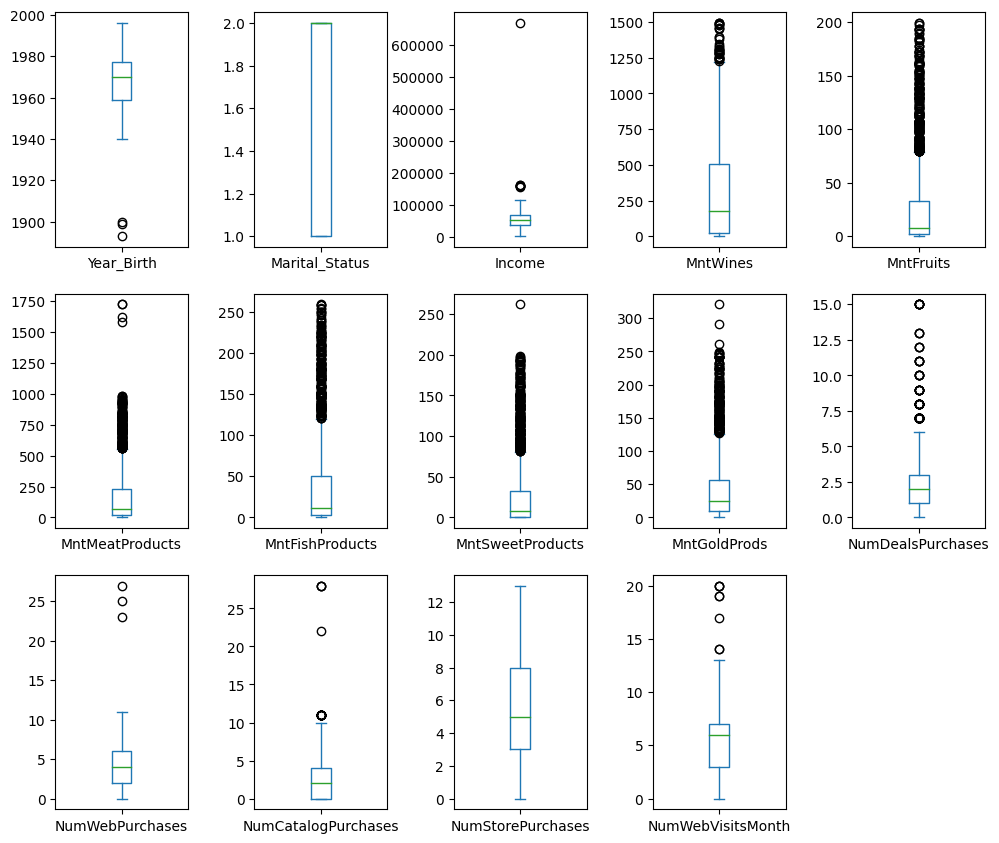

In [12]:
# Plotting all numerical variables and dropping cat variables
data_boxplot = df_clean.drop(columns=['Id', 'Recency', 'Kidhome', 'Teenhome', 'Dt_Customer',
                                         'Response', 'Complain','Education_2n Cycle',
                                         'Education_Basic', 'Education_Graduation',
                                         'Education_Master', 'Education_PhD'])

data_boxplot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Detecting outliers for many variables. Particularly income. These will have to be removed.

In [13]:
# Function to remove outliers based on z-score
def remove_outliers_zscore(df, columns, threshold=3):
    outliers = pd.DataFrame()
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers[column] = z_scores > threshold
    # Removing rows containing outliers
    df_clean = df[~outliers.any(axis=1)]
    return df_clean

In [14]:
# Removing outliers from numerical columns
columns_outliers = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                    'NumStorePurchases', 'NumWebVisitsMonth', 'Year_Birth']

# Removing outliers and creating new df 
df_clean_v2 = remove_outliers_zscore(df_clean, columns_outliers)

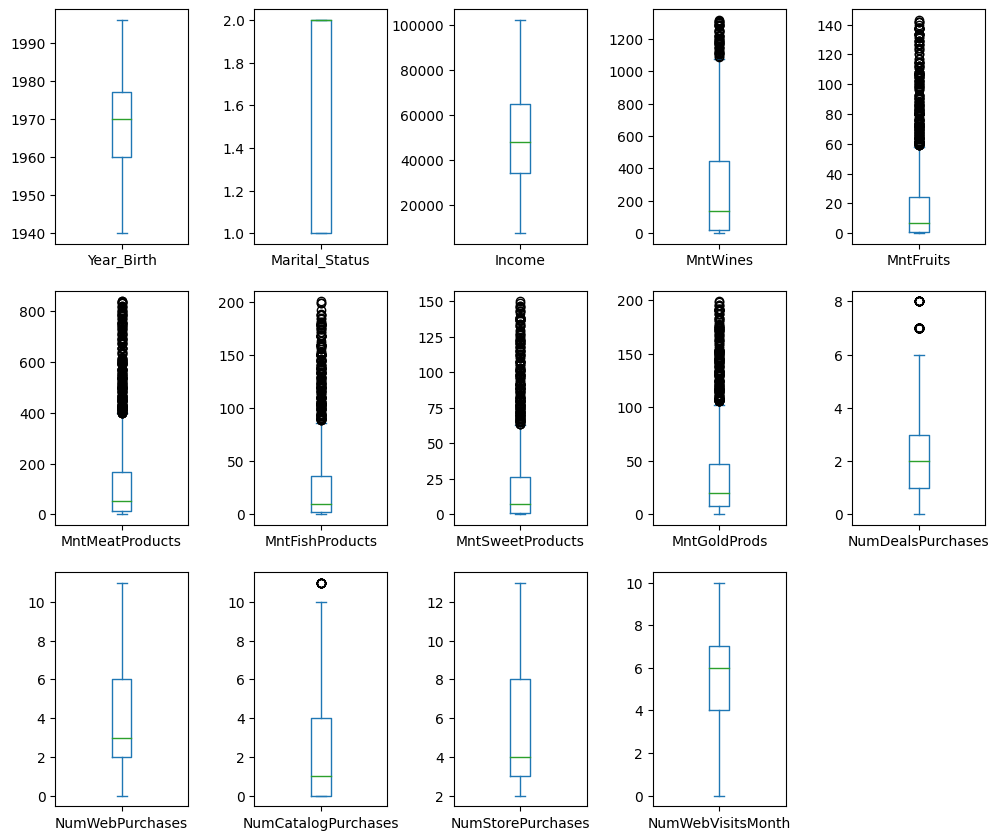

In [16]:
# Plotting after removing outliers
clean_boxplot = df_clean_v2.drop(columns=['Id', 'Recency', 'Kidhome', 'Teenhome', 'Dt_Customer',
                                         'Response', 'Complain','Education_2n Cycle',
                                         'Education_Basic', 'Education_Graduation',
                                         'Education_Master', 'Education_PhD'])

clean_boxplot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

## Feature Engineering

In [106]:
# Calculating Year as feature
current_year = pd.to_datetime('today').year
df_clean_v2['Age'] = current_year - df_clean_v2['Year_Birth']

In [109]:
# Creating three age groups
max_age = df_clean_v2['Age'].max()
min_age = df_clean_v2['Age'].min()

df_clean_v2['Age_Group'] = pd.cut(df_clean_v2['Age'], bins =[min_age, 40, 60, max_age], labels = ['Young_group', 'Mature_group', 'Older_group'])

In [18]:
# Creating year, month and date features for customers sign up.
# We can use this to find seasonal trends in customer aquisition.
df_clean_v2['Join_Year'] = df_clean_v2['Dt_Customer'].dt.year
df_clean_v2['Join_Month'] = df_clean_v2['Dt_Customer'].dt.month
df_clean_v2['Join_Day'] = df_clean_v2['Dt_Customer'].dt.day

In [19]:
# Calculating the total amount spent
df_clean_v2['Total_Mnt_Spent'] = df_clean_v2[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [20]:
# Calculating the amount of kids/teenagers in the family
df_clean_v2['Mnt_Kids'] = df_clean_v2[['Kidhome', 'Teenhome']].sum(axis=1)

In [21]:
# Calculating Customer tenure
current_year = pd.to_datetime('today').year
df_clean_v2['Customer_Tenure'] = current_year - df_clean_v2['Join_Year'] 

In [108]:
max_income = df_clean_v2['Income'].max()
min_income = df_clean_v2['Income'].min()

df_clean_v2['Income_Group'] = pd.cut(df_clean_v2['Income'], bins =[min_income, 30000, 60000, max_income], labels = ['Low', 'Medium', 'High'])

In [23]:
df_clean_v2 = df_clean_v2.sort_values(by='Join_Year')

### EDA - Exploratory Data Analysis

Text(0.5, 1.0, 'Response Rate by Income Group')

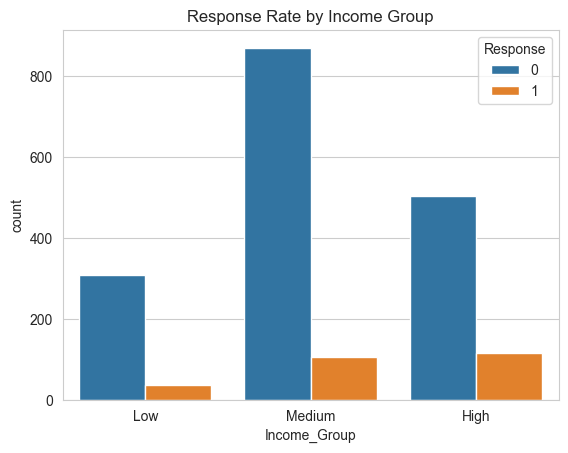

In [40]:
# Plotting relationship between income group and response
sns.set_style('whitegrid')
sns.countplot(x=df_clean_v2['Income_Group'], hue=df_clean_v2['Response'])

plt.title('Response Rate by Income Group')

In [79]:
groupby = df_clean_v2.groupby('Income_Group')['Response'].value_counts(normalize = True)
groupby

Income_Group  Response
Low           0           0.892754
              1           0.107246
Medium        0           0.891505
              1           0.108495
High          0           0.812601
              1           0.187399
Name: proportion, dtype: float64

Higher income groups are more likely to respond to the marketing campaign. Low - medium is around the same.

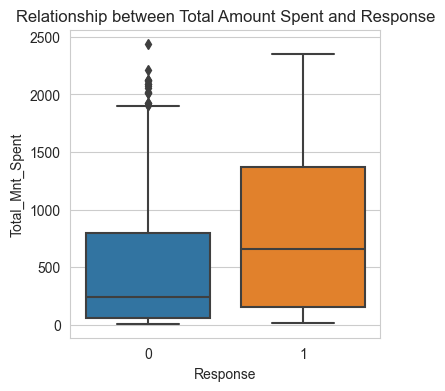

In [92]:
# Boxplot
plt.figure(figsize=(4,4))
sns.boxplot(data=df_clean_v2, x='Response', y='Total_Mnt_Spent')
plt.title('Relationship between Total Amount Spent and Response')
plt.show()

The group responding to the campaign also generally spends more than the group not responding to the campaign

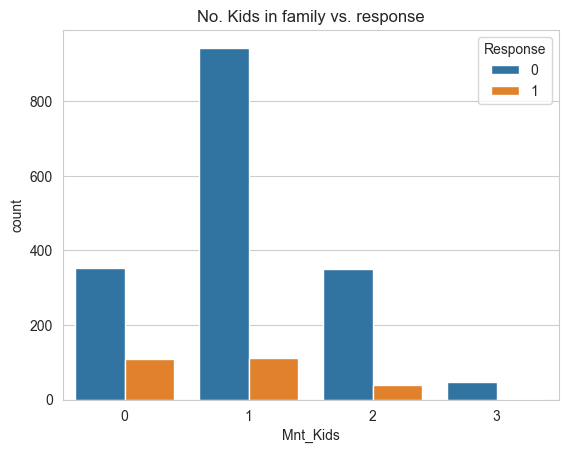

In [98]:
sns.countplot(x = df_clean_v2['Mnt_Kids'], hue = df_clean_v2['Response'])
plt.title('No. Kids in family vs. response')
plt.show()

In [101]:
groupby_kids = df_clean_v2.groupby('Mnt_Kids')['Response'].value_counts(normalize=True)
groupby_kids

Mnt_Kids  Response
0         0           0.762419
          1           0.237581
1         0           0.894787
          1           0.105213
2         0           0.899485
          1           0.100515
3         0           0.978723
          1           0.021277
Name: proportion, dtype: float64

The more kids in the family, the lower the likeability of responding to the campaign


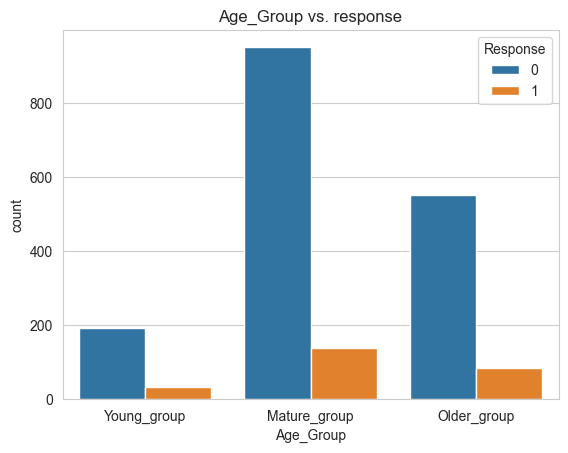

In [111]:
sns.countplot(x = df_clean_v2['Age_Group'], hue = df_clean_v2['Response'])
plt.title('Age_Group vs. response')
plt.show()

In [112]:
groupby_age = df_clean_v2.groupby('Age_Group')['Response'].value_counts(normalize=True)
groupby_age

Age_Group     Response
Young_group   0           0.849558
              1           0.150442
Mature_group  0           0.871442
              1           0.128558
Older_group   0           0.864780
              1           0.135220
Name: proportion, dtype: float64

The younger groups responds best with the campaign, but an interesting finding is also that
the older group (+60) responds better than the mature/middlegroup. 

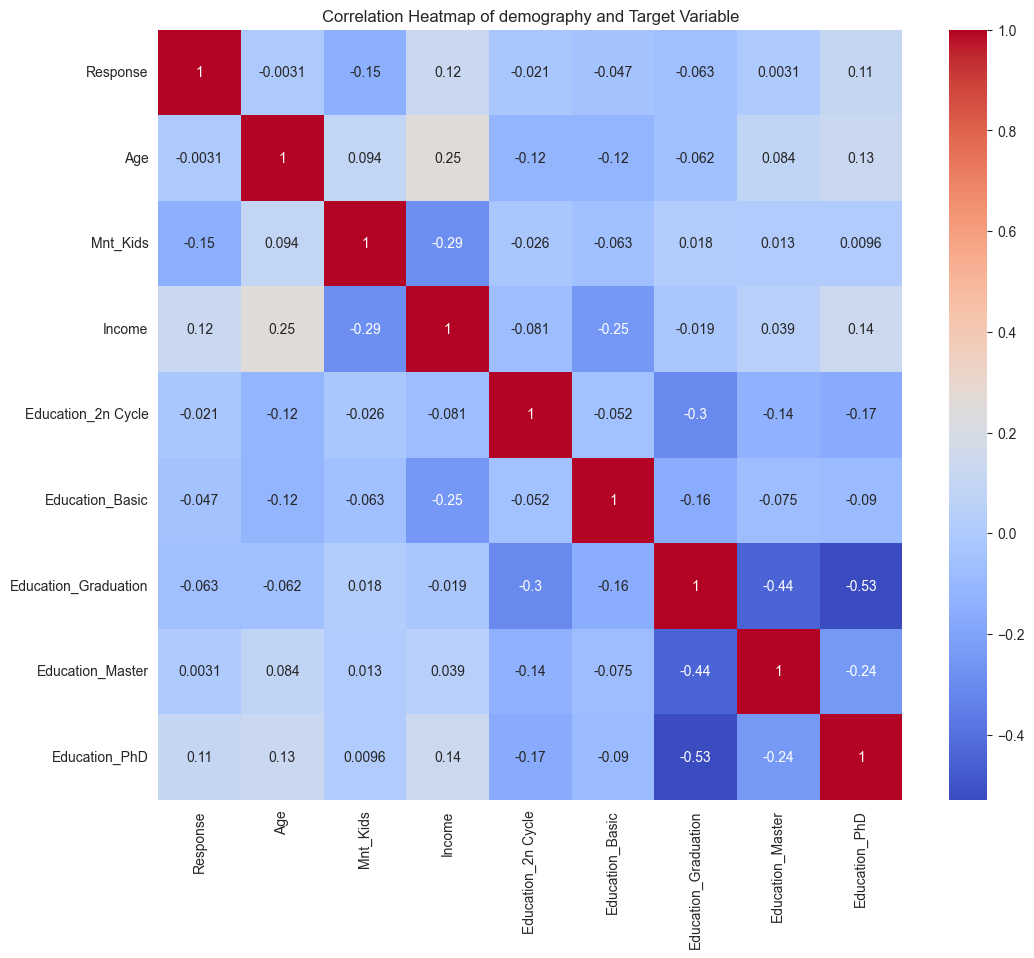

In [125]:
# Checking correlations with demography
demographic_df = df_clean_v2[['Response', 'Age', 'Mnt_Kids', 'Income', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD']]

correlation_matrix = demographic_df.corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of demography and Target Variable')
plt.show()

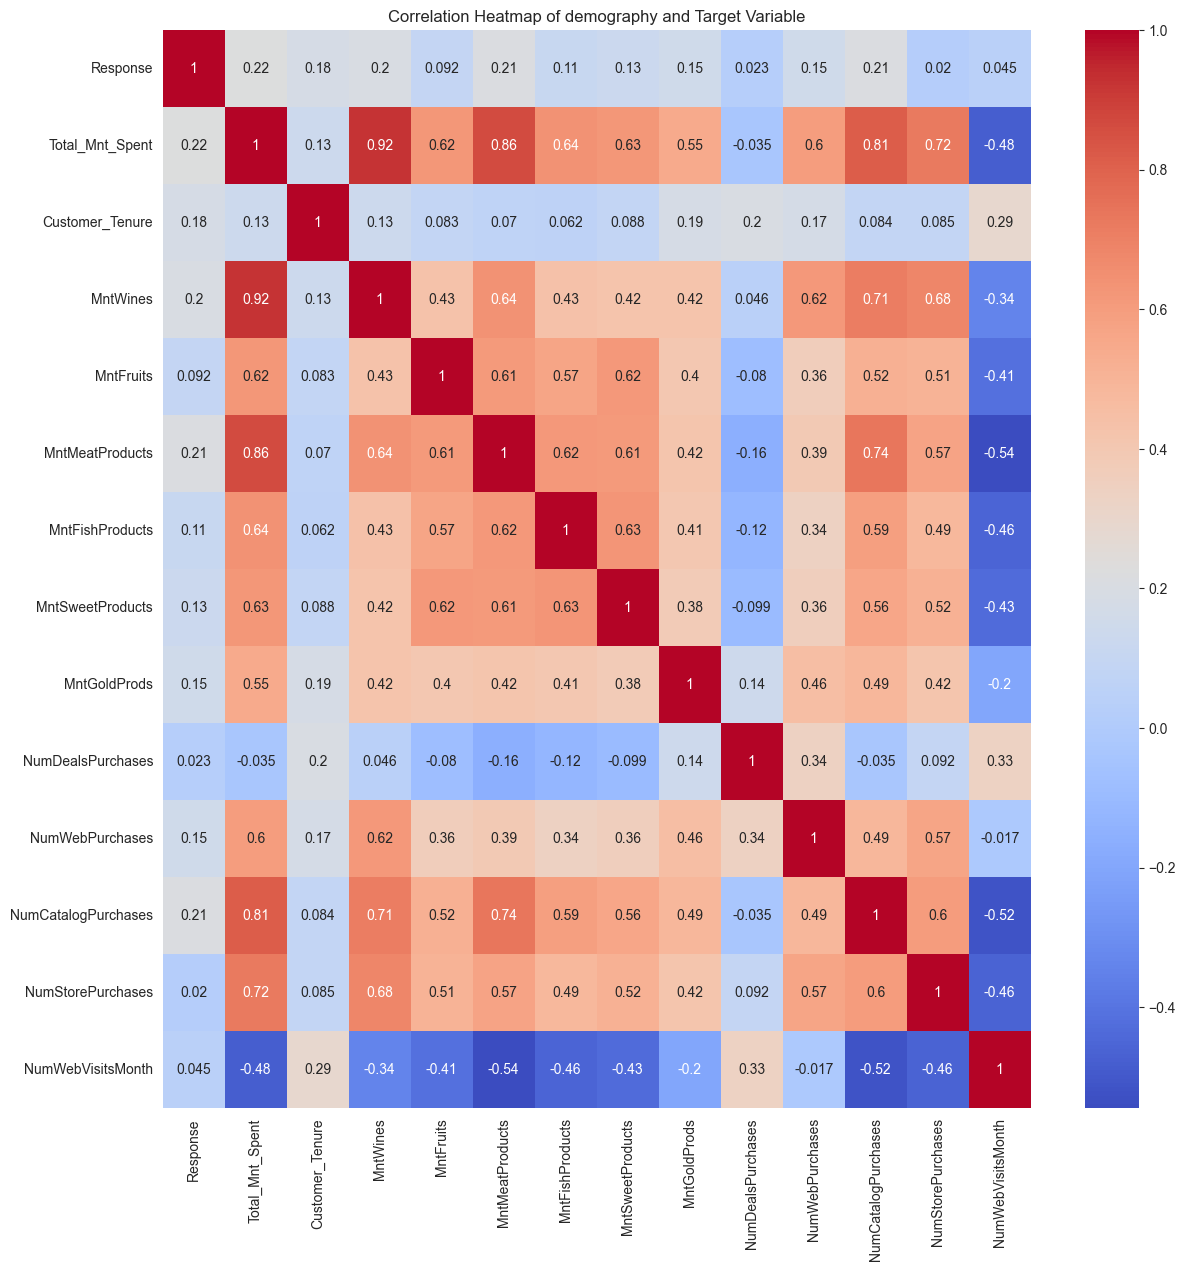

In [196]:
# Checking correlations with numeric columns
numeric_df = df_clean_v2[['Response','Total_Mnt_Spent', 'Customer_Tenure','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']]

correlation_matrix_numeric = numeric_df.corr()

# Plotting heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of demography and Target Variable')
plt.show()

### Maching Learning

In [197]:
# Defining features and target 

X = df_clean_v2[['Income',
    'Total_Mnt_Spent',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'Age',
    'Customer_Tenure',
    'Marital_Status',  
    'Education_2n Cycle',
    'Education_Basic',
    'Education_Graduation']]

y = df_clean_v2['Response']

In [198]:
# Checking for imbalance in y
class_imbalance = y.value_counts(normalize=True)
class_imbalance

Response
0    0.866359
1    0.133641
Name: proportion, dtype: float64

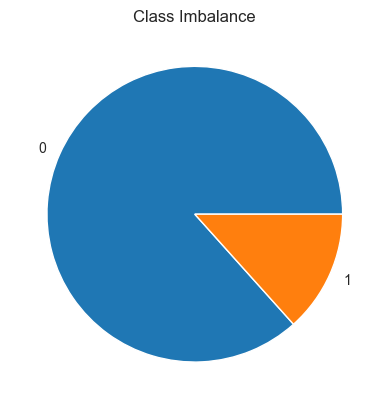

In [199]:
# Plotting imbalance in y
plt.pie(class_imbalance, labels=class_imbalance.index)
plt.title('Class Imbalance')
plt.show()

We see heavy imbalance between classes. I will apply a random oversample to balance.

In [183]:
# Applying random oversampler
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [186]:
# Checking new balance after resampling
new_balance = y_resampled.value_counts()
new_balance

Response
0    1692
1    1692
Name: count, dtype: int64

In [188]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

In [189]:
# Defining features
num_features = [
    'Income',
    'Total_Mnt_Spent',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'Age',
    'Customer_Tenure',
    'Marital_Status' # cat feature, but since it's 1 or 2 I treat as num feature
]

# Categorical features
cat_features = [
    'Education_2n Cycle',
    'Education_Basic',
    'Education_Graduation'
]


In [190]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features) #passthrough since I already one-hot encoded
    ])

model_1 = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier())])

In [191]:
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Total_Mnt_Spent',
                                                   'NumDealsPurchases',
                                                   'NumWebVisitsMonth', 'Age',
                                                   'Customer_Tenure',
                                                   'Marital_Status']),
                                                 ('cat', 'passthrough',
                                                  ['Education_2n Cycle',
                                                   'Education_Basic',
                                                   'Education_Graduation'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callba...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [192]:
# Predicting on the model
y_pred = model_1.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9373522458628841


In [194]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       426
           1       0.89      0.99      0.94       420

    accuracy                           0.94       846
   macro avg       0.94      0.94      0.94       846
weighted avg       0.94      0.94      0.94       846

Confusion Matrix:
[[377  49]
 [  4 416]]
